# <span style='color:#15317E'>01 Capstone Project Setup</span>

In [1]:
######
#### Author: Byron Stuart
#### Data Science Immersive Capstone Project
#### Date 06 June 2017
######

## <span style='color:#7D6115'>Capstone Project Navigation</span>
Step 1 - Capstone Project Setup<br>
<a href='./02%20capstone_indicators.ipynb'>Step 2 - Capstone Indicator Notebook</a><br>
<a href='./03%20capstone_eda_and_models.ipynb'>Step 3 - Capstone EDA and Models Notebook</a><br>
<a href='./04%20capstone_report.ipynb'>Step 4 - Capstone Report Notebook</a><br>

## <span style='color:#7D6115'>Specific Aim</span>
To investigate and analyse the "Health Nutrition and Population Statistics" dataset which attempts to depict the state of human health across the world. This dataset - https://www.kaggle.com/theworldbank/health-nutrition-and-population-statistics - is provided by https://www.kaggle.com/theworldbank. The Content and Context paragraphs (see next section) are verbatim text from the Kaggle overview section.

More specifically to find indicators that are able to predict life expectancy and quality of life. Quality of life is a subjective measure and as I work through the project I will define my specific measures of it. Note that there may end up being more than one neat, well defined definition.

### Content
"HealthStats provides key health, nutrition and population statistics gathered from a variety of international sources. Themes include population dynamics, nutrition, reproductive health, health financing, medical resources and usage, immunization, infectious diseases, HIV/AIDS, DALY, population projections and lending. HealthStats also includes health, nutrition and population statistics by wealth quintiles."

### Context
"This dataset includes 345 indicators, such as immunization rates, malnutrition prevalence, and vitamin A supplementation rates across 263 countries around the world. Data was collected on a yearly basis from 1960-2016."

## <span style='color:#7D6115'>Proposed Methods and Models</span>

### Study Scope
* 1975 to 2015 - 41 years (discard 1960-1974 data)
* Long term trends (the initial EDA will primarily focus here)
* Short term trends
* Not all indicators will be examined
    * Some will be eliminated by choice
    * Some will be eliminated due to lack of data

### Outside of Scope
* Medium Term Trends

### Statistical Tools
* Standardisation of columns
* Correlation analysis
* Histograms
* Bar charts
* Line plots

## <span style='color:#7D6115'>Risks and Assumptions</span>
* That the Kaggle dataset is an accurate recording of collected statistics.
* Null or empty values implies an absence of data in most cases not a data entry error.
* Normal data distributions
* Effective methods will be found for combining some of the many categories into measurable features

## <span style='color:#7D6115'>Evaluate Results</span>
* More analysis is required but there appears to be a strong relationship between life expectancy and the following areas of data:
    * access to better water sources (trending up)
    * access to improved sanitation (trending up)
    * children orphaned by AIDS (trending down)
    * immunization against measles (plateaued)
    * rich versus poor divide could be a future major area of study, not just do wealthy countries achieve better outcomes but also do they spend money inefficiently.
* Some of the data is not normally distributed.
* There are more holes in the data (missing values) than there appeared to be at first. These will need to be examined and actioned on a case by case basis.

## <span style='color:#7D6115'>Future data reduction techniques</span>
Because of the many indicators supplied in the data set it is clear that rigorous processes will need to be applied to reduce the noise in the data. Lasso, Recursive Feature Elimination and Feature Importance (Extra Trees) are potentials to be used in this regard.

### Initial progam imports as supplied by Kaggle

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the data <a name='import_data' />

In [3]:
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) # Does not work in a Windows environment

# Any results you write to the current directory are saved as output.
data = pd.read_csv('../input/data.csv', encoding='utf-8')

### Initial look at the data
The data appears to be clean and accurate. Any null values do not look random, that is they occur in blocks implying an absence of data available rather than missed data. The data is stored in a long format, that is each row relates to a 'country' and 'indicator' resulting in many rows of data. There is a column of data for each year from 1960-2015.

In [4]:
print(data.head(3))

  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   

         1960        1961        1962        1963        1964        1965  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2  133.555013  134.159119  134.857912  134.504576  134.105211  133.569626   

      ...            2007       2008       2009       2010       2011  \
0     ...             NaN        NaN        NaN        NaN        NaN   
1     ...             NaN        NaN        NaN        NaN        NaN   
2     ...       49.999851  49.887046  49.78120

### Column names
As expected except for 'Unnamed: 60', investigate further.

In [5]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

In [6]:
# Check 'Unnamed: 60' for size and null values
print("Size:", data['Unnamed: 60'].shape, "Null count:", data['Unnamed: 60'].isnull().sum())

# All null so drop the column
data.drop(['Unnamed: 60'], axis=1, inplace=True)

Size: (89010,) Null count: 89010


## <span style='color:#7D6115'>Define Project Constants</span>
These will be automatically used by the Python code on the original data set to set it up. Note that these are the initial values and may change as further investigation is undertaken. <a name='years_remove' />

In [7]:
# This constant defines the maxiumum number of null years to accept before rejecting the indicator
null_years_const = 100 # this value may be altered

# Restrict this capstone study to the last 41 years of data - this value may be altered
years_to_remove = ['1960', '1961', '1962', '1963', '1964', '1965', 
                   '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974']

year_columns = list(data.columns[4:])
for year in years_to_remove:
    year_columns.remove(year)
print(year_columns)

data.drop(years_to_remove, axis=1, inplace=True)

['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


## <span style='color:#7D6115'>Data Dictionary</span>

The data consists of (see data.dtypes output in the next cell below):
* Country Name : Object of variable length (some are combinations based on geographic regions or by other groupings)
* Country Code : Object of 3 alphabetic characters (related to the Country Name)
* Indicator Name : Object of variable length (what the metrics stored in the year columns are about)
* Indicator Code : Object of variable length alphabetic + full stops '.' (related to the Indicator Name)
* Years 1975 to 2015: float64 in the form of
    * A percentage
    * Absolute numbers of population
    * Rates (per 1,000 people, per 100,000 people) - these could possibly be converted to percentages, leave for now

In [8]:
# Create a Python "data dictionary" based on the data

# A data dictionary is an object that describes your data. This should contain the name of
# each variable (column), the type of the variable, your description of what the variable is, 
# and the shape (rows and columns) of the entire dataset.

health_stats_dict = {}

health_stats_dict['Shape'] = {"rows:" : data.shape[0], "columns:" : data.shape[1]}

for col, value in zip(data.columns.values, data.dtypes):
    health_stats_dict[col] = [value, (col+" Data Values") if (col[0].isdigit()) else (col+" String")]

for keys,values in health_stats_dict.items():
    print(keys, ':', values)

Shape : {'rows:': 89010, 'columns:': 45}
Country Name : [dtype('O'), 'Country Name String']
Country Code : [dtype('O'), 'Country Code String']
Indicator Name : [dtype('O'), 'Indicator Name String']
Indicator Code : [dtype('O'), 'Indicator Code String']
1975 : [dtype('float64'), '1975 Data Values']
1976 : [dtype('float64'), '1976 Data Values']
1977 : [dtype('float64'), '1977 Data Values']
1978 : [dtype('float64'), '1978 Data Values']
1979 : [dtype('float64'), '1979 Data Values']
1980 : [dtype('float64'), '1980 Data Values']
1981 : [dtype('float64'), '1981 Data Values']
1982 : [dtype('float64'), '1982 Data Values']
1983 : [dtype('float64'), '1983 Data Values']
1984 : [dtype('float64'), '1984 Data Values']
1985 : [dtype('float64'), '1985 Data Values']
1986 : [dtype('float64'), '1986 Data Values']
1987 : [dtype('float64'), '1987 Data Values']
1988 : [dtype('float64'), '1988 Data Values']
1989 : [dtype('float64'), '1989 Data Values']
1990 : [dtype('float64'), '1990 Data Values']
1991 : [dty

### Data types
The columns that specify the country and indicator are objects, everything else is a float, these types do not need to be changed.

In [9]:
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009        

## <span style='color:#7D6115'>Start of EDA</span>
Determine which indicators have enough data to keep.

In [10]:
# Convert all indicators to lower case for easier comparison
data['Indicator Name'] = data['Indicator Name'].str.lower()
indicators = data['Indicator Name'].unique()
print("Number of indicators:", len(indicators))

Number of indicators: 345


In [11]:
def check_group(indicators, identity):
    identity = identity.lower()
    population = [ind for ind in indicators if identity in ind]
    return population

### Function to return data by any combination of countries, indicators and years

In [12]:
# function to return data by any combination of countries, indicators and years
def data_countries_indicators_years(countries=[], indicators=[], years=[]):
    #print(countries, indicators, years)

    # create empty dataframe
    return_data = pd.DataFrame()
    if (len(countries) == 0):
        #print("All countries")
        return_data = data
    else:
        mask = data['Country Name'].isin(countries)
        return_data = data[mask]
        #print(type(return_data), return_data.shape)

    if (len(indicators) == 0):
       #print("All indicators")
        pass
    else:
        mask = return_data['Indicator Name'].isin(indicators)
        return_data = return_data[mask]
        #print(type(return_data), return_data.shape)
        
    columns = ['Country Name', 'Indicator Name', 'Indicator Code']   
    if (len(years) == 0):
        #print("All years")
        for year in year_columns:
            columns.append(year)
        return_data = return_data[columns]
    else:
        return_data = return_data[columns + years]

    return return_data

### Function to return which indicators have sufficient data <a name='check_indicators' />
Some indicators have little data and are not suitable for widescale comparisons. Constants have been defined that will automatically discard some indicators. Run a few tests to try and find a compromise between not throwing out a lot of data and not having too many missing values. See test results within this notebook.

In [13]:
# function to return which indicators have 'adequate' data, will iterate through any combination of countries and indicators
def get_countries_indicators(the_data, years=year_columns):
    #print(years)

    # create empty list
    return_indicators = []

    # Check for null values
    for ind in indicators:
        ind_data = the_data[the_data['Indicator Name'] == ind]
        #print(ind_data)
        null_years = np.sum(ind_data[years].isnull().sum())
        #print(ind_data.shape, null_years, ind)
        if null_years <= null_years_const:
            return_indicators.append(ind)
            #print(null_years, ind)
    
    return return_indicators

### Show 'country' details

In [14]:
# there are 258 'countries' in total
countries = data['Country Name'].unique()
print("Total Countries:", len(countries))

# there are 41 combinations of countries in total (not only geographic combinations)
countries_combos = list(countries[0:41])
print("Combinations of Countries:", len(countries_combos))

Total Countries: 258
Combinations of Countries: 41


### Indicators with Rates (per 1,000 people, per 100,000 people)

In [15]:
for ind in indicators:
    if '000' in ind:
        print(ind)

adolescent fertility rate (births per 1,000 women ages 15-19)
birth rate, crude (per 1,000 people)
community health workers (per 1,000 people)
death rate, crude (per 1,000 people)
hospital beds (per 1,000 people)
incidence of tuberculosis (per 100,000 people)
maternal mortality ratio (modeled estimate, per 100,000 live births)
maternal mortality ratio (national estimate, per 100,000 live births)
mortality caused by road traffic injury (per 100,000 people)
mortality rate, adult, female (per 1,000 female adults)
mortality rate, adult, male (per 1,000 male adults)
mortality rate, infant (per 1,000 live births)
mortality rate, infant, female (per 1,000 live births)
mortality rate, infant, male (per 1,000 live births)
mortality rate, neonatal (per 1,000 live births)
mortality rate, under-5 (per 1,000)
mortality rate, under-5, female (per 1,000)
mortality rate, under-5, male (per 1,000)
number of surgical procedures (per 100,000 population)
nurses and midwives (per 1,000 people)
physicians (

In [16]:
# convert to percentage
for ind in indicators:
    if '100,000' in ind:
        #print(ind)
        the_data = data[data['Indicator Name']==ind][year_columns]/1000
        #print(the_data)
        data.ix[data['Indicator Name']==ind, year_columns] = the_data

In [17]:
# convert to percentage
for ind in indicators:
    if '1,000' in ind:
        #print(ind)
        the_data = data[data['Indicator Name']==ind][year_columns]/10
        #print(the_data)
        data.ix[data['Indicator Name']==ind, year_columns] = the_data

### Make a separate World dataset
This set is used for the initial test of predicting life expectancy.

In [18]:
# Will use World as a stand alone (not as part of other combos)
world_category = ['World']
world_data = data_countries_indicators_years(world_category)
world_data.fillna(0, inplace=True)
world_data.head(2)

# write world_data to file
#world_data.to_csv('./world_data.csv')

,Country Name,Indicator Name,Indicator Code,1975,1976,1977,1978,1979,1980,1981,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
13800,World,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13801,World,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Determine which combinations of countries will be used and which ones discarded
There are many combinations and it is beyond the scope of this project to investigate every single one, some of them will be discarded.

In [19]:
# 'World' has been saved separately so remove it
countries_combos.remove('World')

# Not interested in these combinations
countries_combos.remove('Early-demographic dividend')
countries_combos.remove('Late-demographic dividend')
countries_combos.remove('Pre-demographic dividend')
countries_combos.remove('Post-demographic dividend')

# No medium or large state categories to compare them to so remove
countries_combos.remove('Other small states')
countries_combos.remove('Small states')

# Stick to analysing broad regions without further breakdowns, remove income sub categories
countries_combos.remove('East Asia & Pacific (excluding high income)')
countries_combos.remove('East Asia & Pacific (IDA & IBRD countries)')
countries_combos.remove('Europe & Central Asia (excluding high income)')
countries_combos.remove('Europe & Central Asia (IDA & IBRD countries)')
countries_combos.remove('Latin America & Caribbean (excluding high income)')
countries_combos.remove('Latin America & the Caribbean (IDA & IBRD countries)')
countries_combos.remove('Middle East & North Africa (excluding high income)')
countries_combos.remove('Middle East & North Africa (IDA & IBRD countries)')
countries_combos.remove('South Asia (IDA & IBRD)')
countries_combos.remove('Sub-Saharan Africa (excluding high income)')
countries_combos.remove('Sub-Saharan Africa (IDA & IBRD countries)')
countries_combos.remove('OECD members')

### Make datasets based on broad cross country income categories
Income sub categories were removed in the previous step.

In [20]:
# Make a separate set for the cross country income indicators
income_categories = [co for co in countries_combos if 'income' in co]
print(income_categories)

income_indicators = []
for id in income_categories:
    # get the data subset
    income_data = data_countries_indicators_years([id])
    # get the indicators
    new_indicators = get_countries_indicators(income_data)
    # do a union of the chosen indicators so each income category can use the same set
    income_indicators = list(set(income_indicators).union(new_indicators))
    #print(len(income_indicators))

print()
print("income_categories has", len(income_indicators), "indicators with adequate data")
income_data = data_countries_indicators_years(income_categories)
income_data.fillna(0, inplace=True)
income_data.head(2)

# write income_data to file
#income_data.to_csv('./income_data.csv')

['High income', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle income', 'Upper middle income']

income_categories has 345 indicators with adequate data


,Country Name,Indicator Name,Indicator Code,1975,1976,1977,1978,1979,1980,1981,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4830,High income,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4831,High income,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test results for determining number of years and null_years_const values

In [21]:
# income_categories has 345 indicators with adequate data - for null_years_const = 100, years = 41

### Remove the income categories from the country combinations

In [22]:
# As income_categories have been made into a separate set remove them from countries_combos
for id in income_categories:
    countries_combos.remove(id)

### Process the  country combinations <a name='combos_indicators' />

In [23]:
### Process the remaining country combination categories

print("Country Combinations Kept:", len(countries_combos))
#print(countries_combos)

combos_indicators = []
for id in countries_combos:
    print(id)
    # get the data subset
    combos_data = data_countries_indicators_years([id])
    # get the indicators
    new_indicators = get_countries_indicators(combos_data)
    # do a union of the chosen indicators so each income category can use the same set
    combos_indicators = list(set(combos_indicators).union(new_indicators))
    #print(len(combos_indicators))

print()
print("countries_combos has", len(combos_indicators), "indicators with adequate data")
combos_data = data_countries_indicators_years(countries_combos)
combos_data.fillna(0, inplace=True)
combos_data.head(2)

# write combos_data to file
#combos_data.to_csv('./combos_data.csv')

Country Combinations Kept: 16
Arab World
Caribbean small states
Central Europe and the Baltics
East Asia & Pacific
Euro area
Europe & Central Asia
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
Latin America & Caribbean
Least developed countries: UN classification
Middle East & North Africa
North America
Pacific island small states
South Asia
Sub-Saharan Africa

countries_combos has 345 indicators with adequate data


,Country Name,Indicator Name,Indicator Code,1975,1976,1977,1978,1979,1980,1981,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arab World,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test results for determining number of years and null_years_const values

In [24]:
# countries_combos has 345 indicators with adequate data - for null_years_const = 20, years = 41

### Process the single countries

In [25]:
countries_single = countries[41:]
print("Single Countries:", len(countries_single))
print(countries_single)

single_indicators = []
for id in countries_single:
    #print(id)
    # get the data subset
    single_data = data_countries_indicators_years([id])
    # get the indicators
    new_indicators = get_countries_indicators(single_data)
    # do a union of the chosen indicators so each income category can use the same set
    single_indicators = list(set(single_indicators).union(new_indicators))
    #print(len(single_indicators))

print()
print("countries_single has", len(single_indicators), "indicators with adequate data")
single_data = data_countries_indicators_years(countries_single)
single_data.fillna(0, inplace=True)
single_data.head(2)

# write single_data to file
#single_data.to_csv('./single_data.csv')

Single Countries: 217
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands' 'Central African Republic'
 'Chad' 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia, The' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 

,Country Name,Indicator Name,Indicator Code,1975,1976,1977,1978,1979,1980,1981,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
14145,Afghanistan,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0
14146,Afghanistan,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test results for determining number of years and null_years_const values

In [26]:
# countries_single has 345 indicators with adequate data - for null_years_const = 20, years = 41

In [27]:
print(set(combos_indicators) - set(income_indicators), "can be added to income_indicators")
# add the extra indicator to income_indicators
income_indicators = combos_indicators

print()
combined_indicators = list(set().union(income_indicators, combos_indicators, single_indicators))
print("There are", set(combined_indicators) - set(single_indicators), "indicators to add to single_indicators")

set() can be added to income_indicators

There are set() indicators to add to single_indicators


In [28]:
len(single_indicators)
indicators_df = pd.DataFrame(columns=['name', 'indicator'])
for ind in income_indicators:
    indicators_df.loc[indicators_df.shape[0]] = ['income', ind]
for ind in combos_indicators:
    indicators_df.loc[indicators_df.shape[0]] = ['combos', ind]
for ind in single_indicators:
    indicators_df.loc[indicators_df.shape[0]] = ['single', ind]
indicators_df.head(3)

,name,indicator
0,income,"age population, age 16, female, interpolated"
1,income,"age population, age 10, female, interpolated"
2,income,"primary completion rate, total (% of relevant ..."


## <span style='color:#7D6115'>Write data to SQL database</span>
Write all essential data to a SQL database so that it can be imported by other code.

In [29]:
# Import Sqlite3 Library
import sqlite3
#The SQL Sub-library from Pandas will allow us to run SQL queries within python.
from pandas.io import sql

# Establishing the Connection to our Database.  If no database exists here, this will create one.
connection = sqlite3.connect('../input/data.db.sqlite')

# Converts a DataFrame into a SQL database
data.to_sql(name='world_health', con=connection, if_exists='replace', index=False)

world_data.to_sql(name='world_health_world', con=connection, if_exists='replace', index=False)
income_data.to_sql(name='world_health_income', con=connection, if_exists='replace', index=False)
combos_data.to_sql(name='world_health_combos', con=connection, if_exists='replace', index=False)
single_data.to_sql(name='world_health_single', con=connection, if_exists='replace', index=False)

indicators_df.to_sql(name='world_health_indicators', con=connection, if_exists='replace', index=False)

# define function to use when querying the sql database
def Q(query, db=connection):
    return sql.read_sql(query, db)

Q('select * from world_health limit 14145, 1')

C:\Users\trade\Anaconda3\lib\site-packages\pandas\core\generic.py:1201: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


,Country Name,Country Code,Indicator Name,Indicator Code,1975,1976,1977,1978,1979,1980,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,None,None,None,None,None,None,...,None,None,None,None,None,1.5,None,None,None,None


In [30]:
connection.close()

## <span style='color:#7D6115'>End SQL database code</span>

## <span style='color:#7D6115'>Initial capstone analysis</span>
This analysis was submitted for part 2 of the capstone project.
### Look at all the indicators

In [31]:
#Original number of indicators: 345
#indicators = data['Indicator Name'].unique()
indicators = combined_indicators
print("Number of indicators:", len(indicators))
for ind in indicators:
    print(ind)

Number of indicators: 345
age population, age 10, female, interpolated
age population, age 16, female, interpolated
primary completion rate, total (% of relevant age group)
age population, age 12, male, interpolated
age population, age 15, male, interpolated
population ages 80 and older, male (% of male population)
share of women employed in the nonagricultural sector (% of total nonagricultural employment)
school enrollment, secondary, female (% gross)
population ages 65 and above, male
condom use, population ages 15-24, male (% of males ages 15-24)
demand for family planning satisfied by any methods (% of married women with demand for family planning)
school enrollment, primary, female (% net)
population ages 00-14, male (% of total)
age population, age 07, female, interpolated
school enrollment, primary, female (% gross)
school enrollment, primary (% gross)
age population, age 17, female, interpolated
age population, age 06, male, interpolated
literacy rate, youth male (% of males a

In [32]:
# Function that has 2 parameters, a list of indicators and a string to search for in those indicators.
# After the indicators matching 'identity' have been found remove them from indicators and return the results,
# this will make sure the same indicator is not included in a subsequent list.
def population_group(indicators, identity):
    identity = identity.lower()
    population = [ind for ind in indicators if identity in ind]
    print("Related to", identity, len(population))
    #indicators = set(indicators) - set(population) # fails on the same values as setdiff1d
    indicators = np.setdiff1d(indicators, population)
    return population, indicators

In [33]:
#combined_indicators

### Attempt to group indicators into related categories

In [34]:
# Categorise indicators into groups
life_expectancy, indicators = population_group(indicators, 'Life expectancy')
diabetes, indicators = population_group(indicators, 'diabetes')
undernourished, indicators = population_group(indicators, 'undernourished')
hiv, indicators = population_group(indicators, 'HIV')
aids, indicators = population_group(indicators, 'aids estimated deaths')
age_population, indicators = population_group(indicators, 'Age population')
population_ages, indicators = population_group(indicators, 'Population ages')
female_population, indicators = population_group(indicators, 'Female population')
male_population, indicators = population_group(indicators, 'Male population')
health_expenditure, indicators = population_group(indicators, 'Health expenditure')
mortality_rate, indicators = population_group(indicators, 'Mortality rate')
survival_65, indicators = population_group(indicators, 'survival to age 65')
school_enrollment, indicators = population_group(indicators, 'School enrollment')

# some indicators with this 'identity' still show up down near the bottom as being unclassified
# could be a bug with the function setdiff1d, might only be Windows that's affected?
primary_completion_rate = population_group(indicators, 'Primary completion rate')

malnutrition, indicators = population_group(indicators, 'Malnutrition')
overweight, indicators = population_group(indicators, 'overweight')
immunization, indicators = population_group(indicators, 'Immunization')
sanitation, indicators = population_group(indicators, 'sanitation')
wasting, indicators = population_group(indicators, 'wasting')
birth, indicators = population_group(indicators, 'birth')
death, indicators = population_group(indicators, 'death')
condom, indicators = population_group(indicators, 'Condom')
water, indicators = population_group(indicators, 'water')
population, indicators = population_group(indicators, 'Population')
anemia, indicators = population_group(indicators, 'anemia')
contraceptive, indicators = population_group(indicators, 'Contraceptive')
smoking, indicators = population_group(indicators, 'Smoking')
diarrhea, indicators = population_group(indicators, 'Diarrhea')
unemployment, indicators = population_group(indicators, 'Unemployment')
maternal, indicators = population_group(indicators, 'Maternal')
marriage, indicators = population_group(indicators, 'marriage')
tuberculosis, indicators = population_group(indicators, 'Tuberculosis')

Related to life expectancy 3
Related to diabetes 1
Related to undernourished 1
Related to hiv 18
Related to aids estimated deaths 1
Related to age population 53
Related to population ages 54
Related to female population 17
Related to male population 17
Related to health expenditure 11
Related to mortality rate 9
Related to survival to age 65 2
Related to school enrollment 14
Related to primary completion rate 3
Related to malnutrition 6
Related to overweight 6
Related to immunization 6
Related to sanitation 3
Related to wasting 6
Related to birth 12
Related to death 12
Related to condom 2
Related to water 3
Related to population 23
Related to anemia 4
Related to contraceptive 2
Related to smoking 2
Related to diarrhea 2
Related to unemployment 3
Related to maternal 1
Related to marriage 2
Related to tuberculosis 3


### Set y target and X predictors
The target feature selected is 'life expectancy at birth, total (years)'. Predictor features related to health issues have been selected to test for correlation. The 'World' data will be used for this.

In [35]:
# Target y
y_indicator = 'life expectancy at birth, total (years)'
y = data_countries_indicators_years(['World'], [y_indicator])[year_columns]
print("y.shape:", y.shape)

# Predictors X
X_indicators = undernourished + hiv + health_expenditure + malnutrition + \
overweight + immunization + sanitation + water + anemia + unemployment

test_data = data_countries_indicators_years(['World'], X_indicators)#[year_columns]
print("test_data.shape:", test_data.shape)

column_names = [list(test_data['Indicator Name'])]
test_data.drop(['Country Name'], axis=1, inplace=True)
test_data.drop(['Indicator Name'], axis=1, inplace=True)
test_data.drop(['Indicator Code'], axis=1, inplace=True)

# invert the dataframe so that the predictors and y are columns
test_data = test_data.T

# rename the columns
test_data.columns = column_names
print('test_data.shape after transpose', test_data.shape)

y.shape: (1, 41)
test_data.shape: (61, 44)
test_data.shape after transpose (41, 61)


### Many missing values time to examine some distributions
There are no values at all for years 1975 to 1989 so these rows will be dropped.

In [36]:
test_data = test_data.drop(test_data.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]])
test_data.head(3)

,% of females ages 15-49 having comprehensive correct knowledge about hiv (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about hiv (2 prevent ways and reject 3 misconceptions),adults (ages 15+) and children (0-14 years) living with hiv,adults (ages 15+) and children (ages 0-14) newly infected with hiv,adults (ages 15+) living with hiv,adults (ages 15+) newly infected with hiv,antiretroviral therapy coverage (% of people living with hiv),antiretroviral therapy coverage for pmtct (% of pregnant women living with hiv),children (0-14) living with hiv,children (ages 0-14) newly infected with hiv,...,prevalence of overweight (% of adults),prevalence of overweight (% of children under 5),"prevalence of overweight, female (% of children under 5)","prevalence of overweight, female (% of female adults)","prevalence of overweight, male (% of children under 5)","prevalence of overweight, male (% of male adults)","unemployment, female (% of female labor force)","unemployment, male (% of male labor force)","unemployment, total (% of total labor force)",women's share of population ages 15+ living with hiv (%)
1990,NaN,NaN,9100000.0,2000000.0,8700000.0,1800000.0,NaN,NaN,400000.0,190000.0,...,NaN,4.846598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.090596
1991,NaN,NaN,10900000.0,2300000.0,10400000.0,2100000.0,NaN,NaN,490000.0,220000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.711817,6.010209,6.299013,45.770025
1992,NaN,NaN,12900000.0,2600000.0,12300000.0,2400000.0,NaN,NaN,600000.0,260000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.204265,5.702540,5.888352,46.442748


### Check columns for nulls

In [37]:
test_data.isnull().sum()

% of females ages 15-49 having comprehensive correct knowledge about hiv (2 prevent ways and reject 3 misconceptions)    26
% of males ages 15-49 having comprehensive correct knowledge about hiv (2 prevent ways and reject 3 misconceptions)      26
adults (ages 15+) and children (0-14 years) living with hiv                                                               0
adults (ages 15+) and children (ages 0-14) newly infected with hiv                                                        0
adults (ages 15+) living with hiv                                                                                         0
adults (ages 15+) newly infected with hiv                                                                                 0
antiretroviral therapy coverage (% of people living with hiv)                                                            10
antiretroviral therapy coverage for pmtct (% of pregnant women living with hiv)                                          20
children

### Remove columns with 20 or more nulls

In [38]:
print("Columns with more than 20 nulls")
cols_to_drop = []
for col in test_data.columns:
    num_nulls = test_data[col].isnull().sum()
    if num_nulls > 20:
        print(col, num_nulls)
        cols_to_drop.append(col)

print()
print('original shape', test_data.shape)
for col in cols_to_drop:
    test_data.drop([col], axis=1, inplace=True)
print('changed shape', test_data.shape)

Columns with more than 20 nulls
% of females ages 15-49 having comprehensive correct knowledge about hiv (2 prevent ways and reject 3 misconceptions) 26
% of males ages 15-49 having comprehensive correct knowledge about hiv (2 prevent ways and reject 3 misconceptions) 26
comprehensive correct knowledge of hiv/aids, ages 15-24, female (2 prevent ways and reject 3 misconceptions) 26
comprehensive correct knowledge of hiv/aids, ages 15-24, male (2 prevent ways and reject 3 misconceptions) 26
health expenditure, public (% of government expenditure) 24
health expenditure, total (current us$) 26
immunization, hib3 (% of children ages 12-23 months) 23
malnutrition prevalence, height for age, female (% of children under 5) 26
malnutrition prevalence, height for age, male (% of children under 5) 26
malnutrition prevalence, weight for age, female (% of children under 5) 26
malnutrition prevalence, weight for age, male (% of children under 5) 26
prevalence of overweight (% of adults) 26
prevalenc

### Plot the distributions for the columns that remain

adults (ages 15+) and children (0-14 years) living with hiv


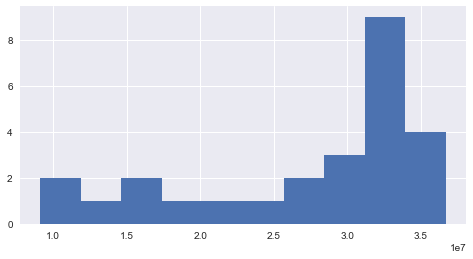

adults (ages 15+) and children (ages 0-14) newly infected with hiv


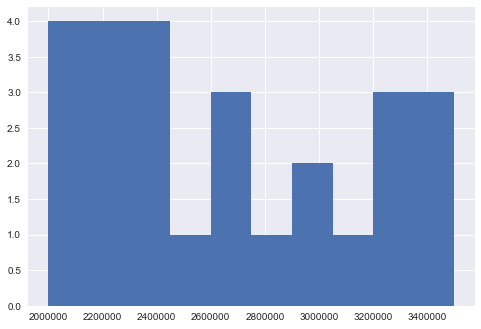

adults (ages 15+) living with hiv


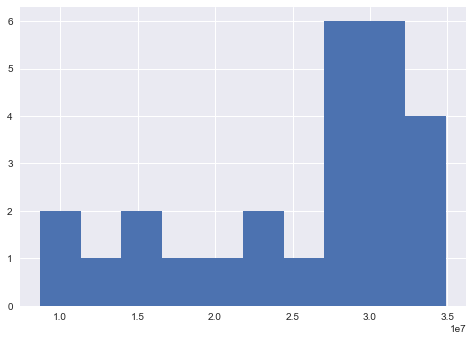

adults (ages 15+) newly infected with hiv


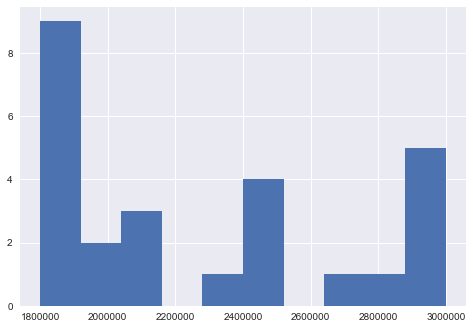

antiretroviral therapy coverage (% of people living with hiv)


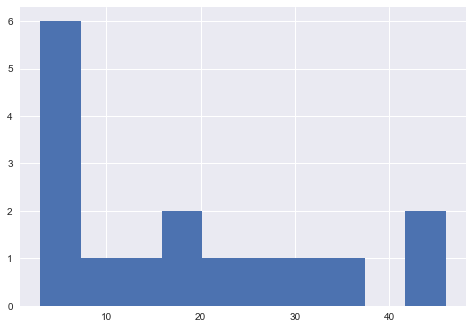

antiretroviral therapy coverage for pmtct (% of pregnant women living with hiv)


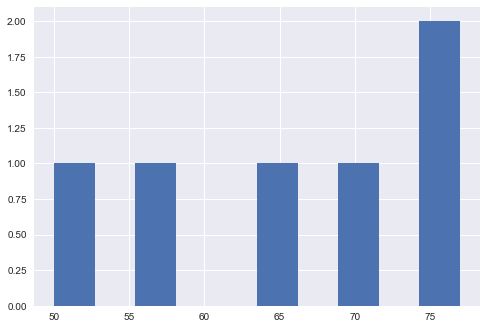

children (0-14) living with hiv


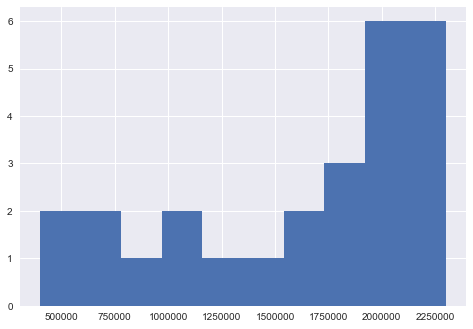

children (ages 0-14) newly infected with hiv


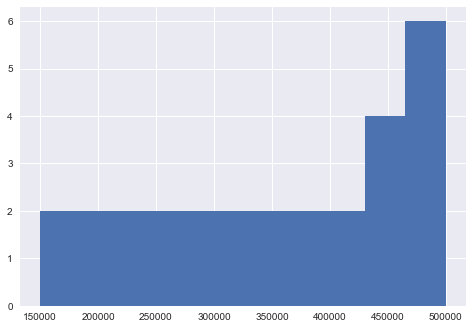

children orphaned by hiv/aids


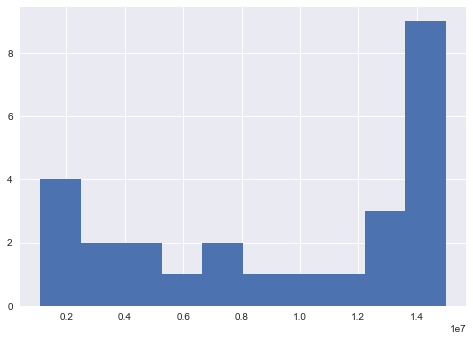

health expenditure per capita (current us$)


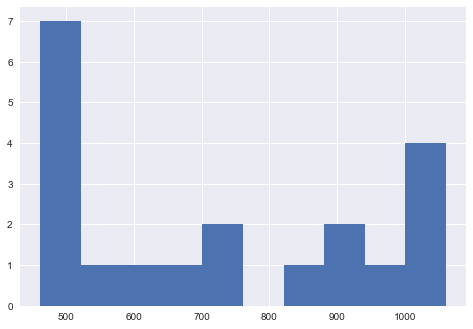

health expenditure per capita, ppp


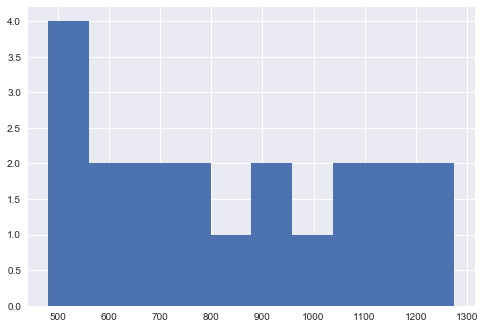

health expenditure, private (% of gdp)


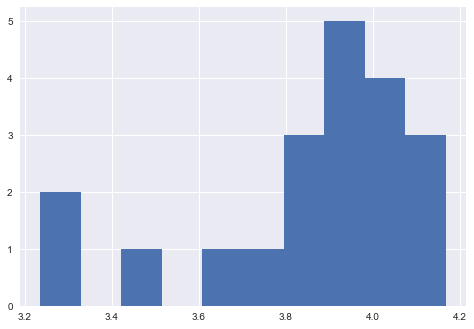

health expenditure, private (% of total health expenditure)


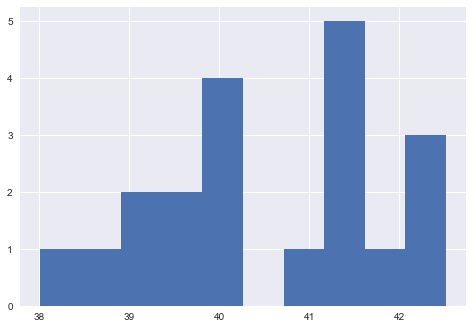

health expenditure, public (% of gdp)


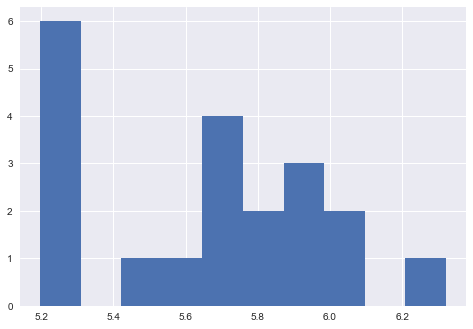

health expenditure, public (% of total health expenditure)


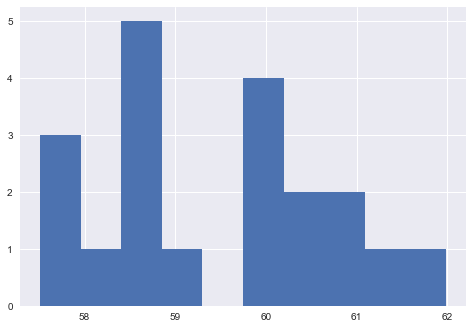

health expenditure, total (% of gdp)


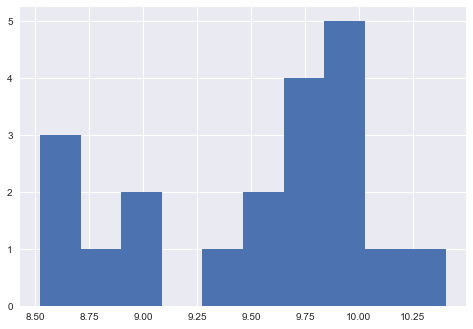

immunization, bcg (% of one-year-old children)


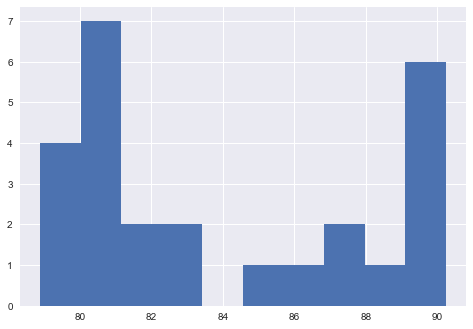

immunization, dpt (% of children ages 12-23 months)


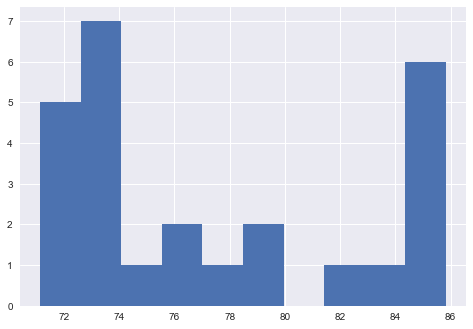

immunization, hepb3 (% of one-year-old children)


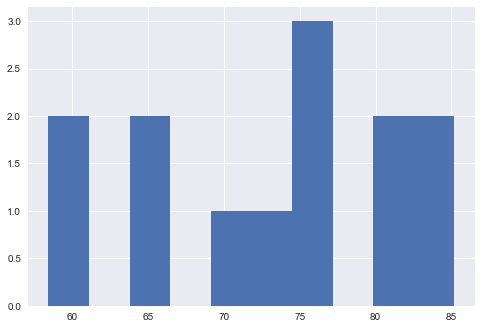

immunization, measles (% of children ages 12-23 months)


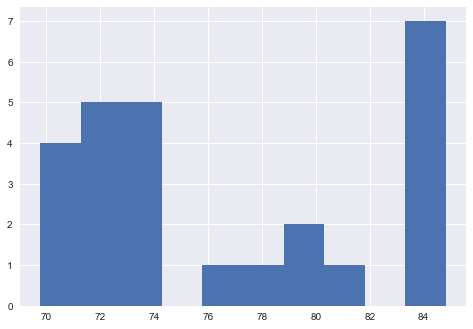

immunization, pol3 (% of one-year-old children)


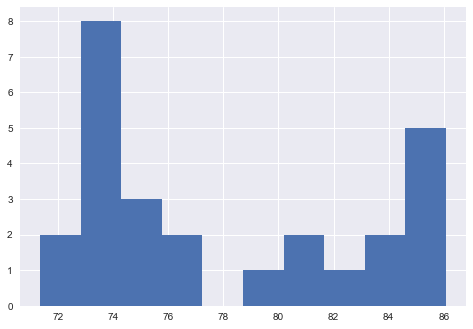

improved sanitation facilities (% of population with access)


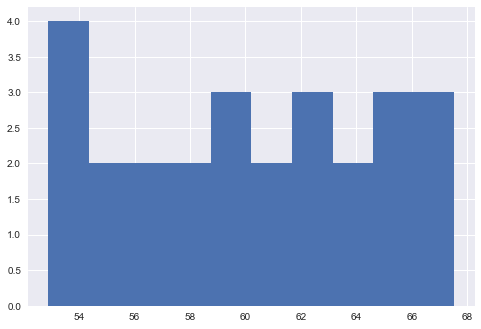

improved sanitation facilities, rural (% of rural population with access)


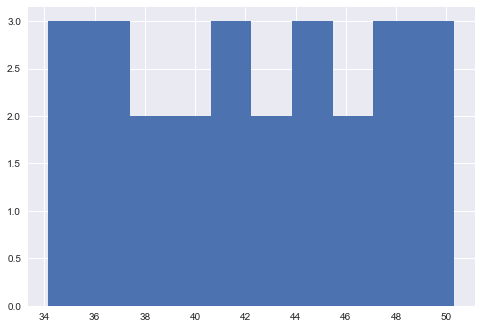

improved sanitation facilities, urban (% of urban population with access)


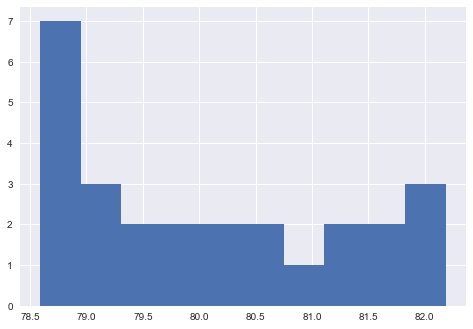

improved water source (% of population with access)


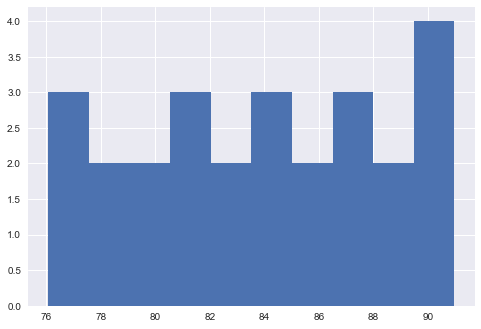

improved water source, rural (% of rural population with access)


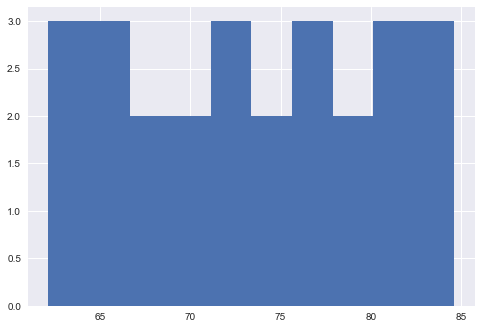

improved water source, urban (% of urban population with access)


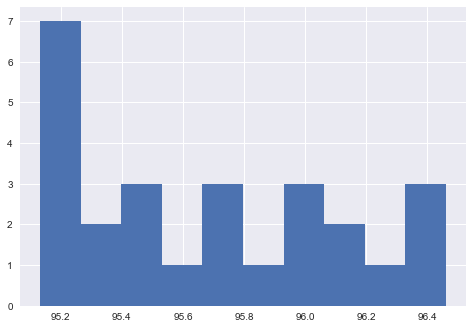

incidence of hiv (% of uninfected population ages 15-49)


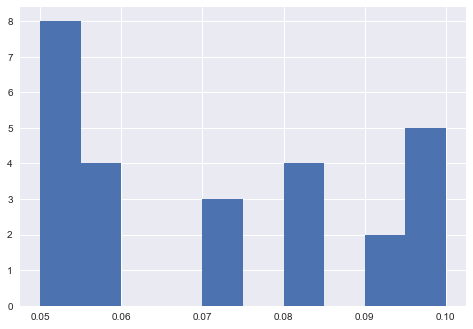

malnutrition prevalence, height for age (% of children under 5)


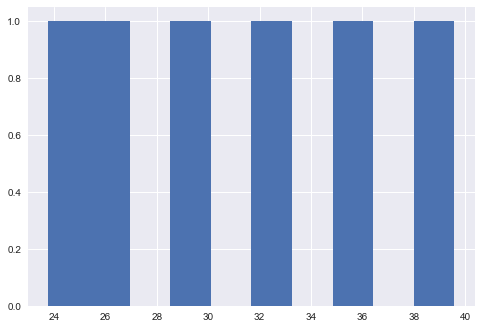

malnutrition prevalence, weight for age (% of children under 5)


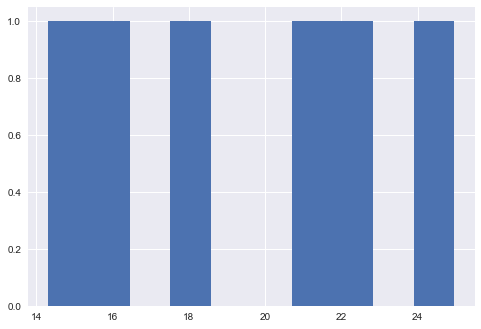

number of people who are undernourished


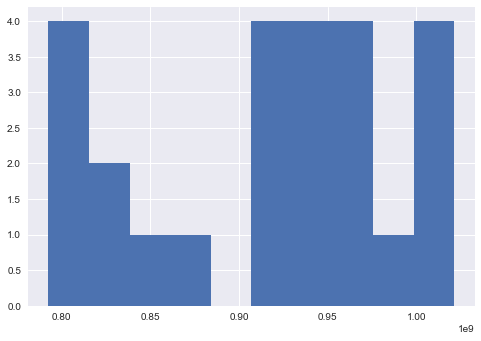

out-of-pocket health expenditure (% of private expenditure on health)


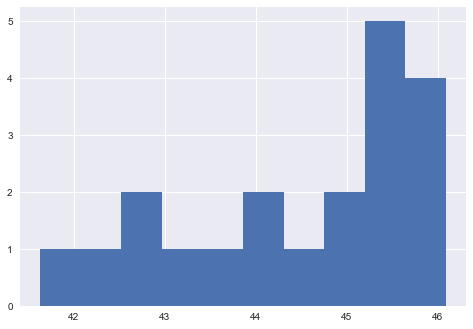

out-of-pocket health expenditure (% of total expenditure on health)


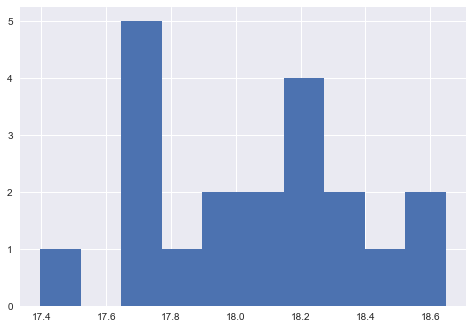

prevalence of anemia among children (% of children under 5)


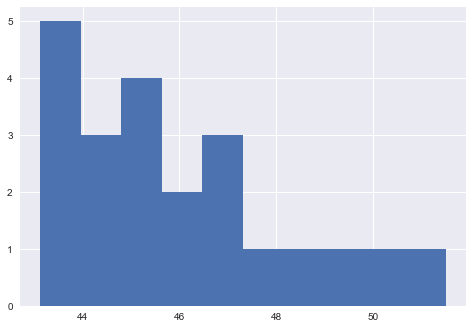

prevalence of anemia among non-pregnant women (% of women ages 15-49)


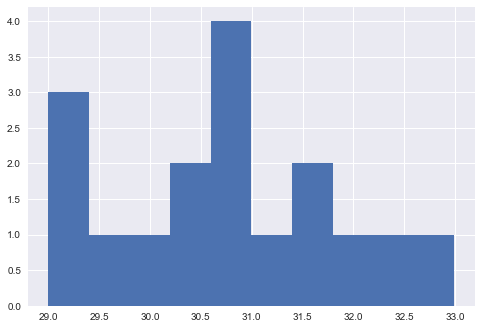

prevalence of anemia among pregnant women (%)


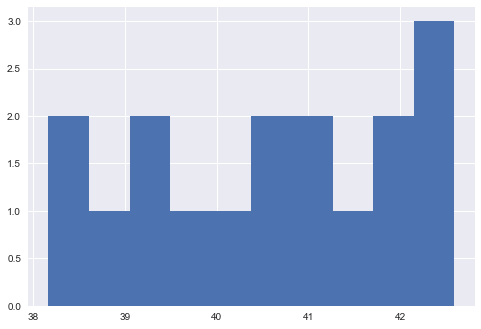

prevalence of anemia among women of reproductive age (% of women ages 15-49)


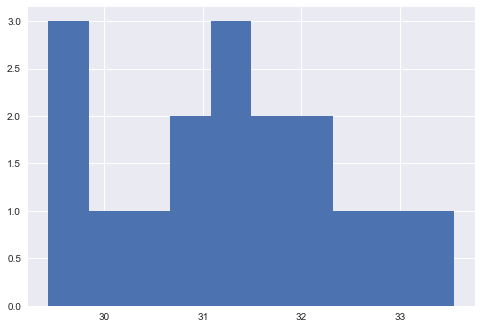

prevalence of hiv, female (% ages 15-24)


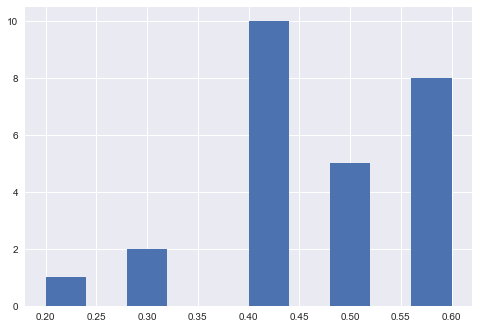

prevalence of hiv, male (% ages 15-24)


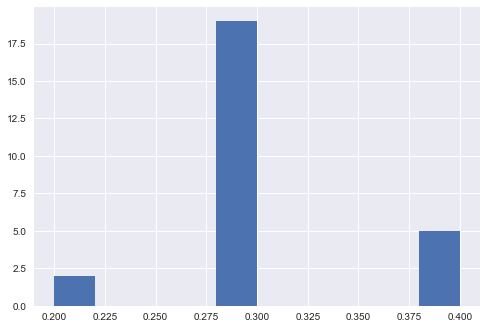

prevalence of hiv, total (% of population ages 15-49)


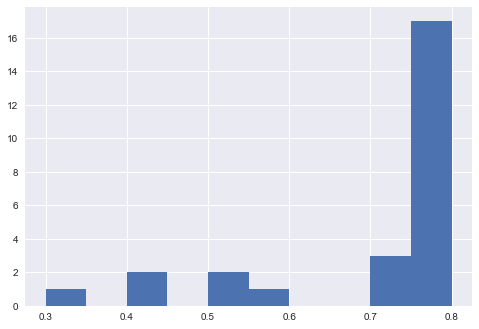

prevalence of overweight (% of children under 5)


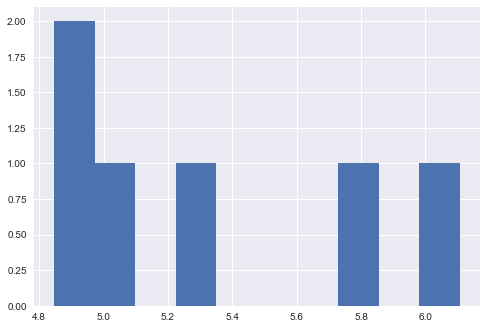

unemployment, female (% of female labor force)


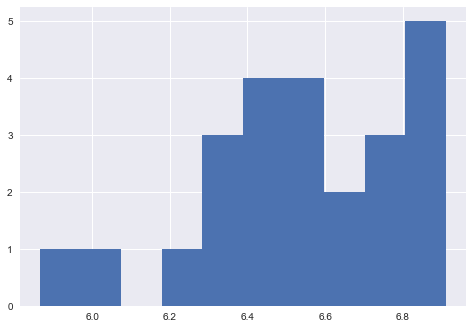

unemployment, male (% of male labor force)


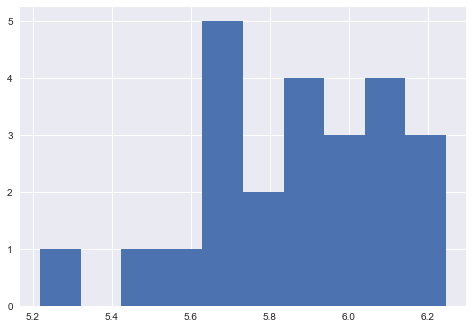

unemployment, total (% of total labor force)


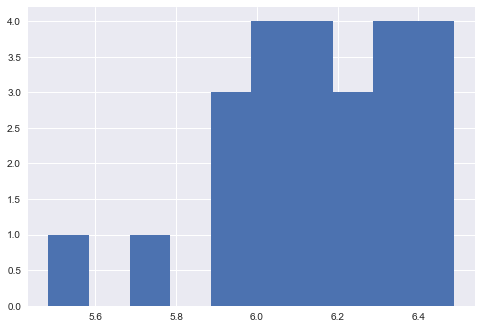

women's share of population ages 15+ living with hiv (%)


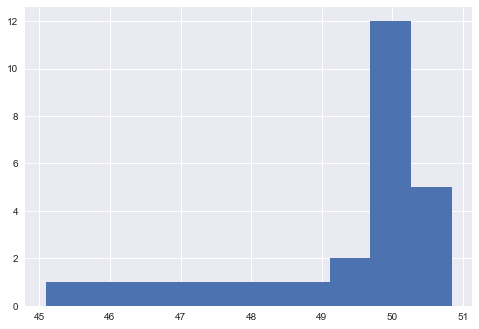

In [39]:
fig = plt.figure(figsize=(8,4))

# Look at distributions, 45 in total!
for ind in test_data.columns:
    print(ind)
    test_data[ind].hist()
    plt.show()

#undernourished
#hiv
#print(health_expenditure)
#print(malnutrition)
#print(overweight)
#print(immunization)
#print(sanitation)
#print(water)
#print(anemia)
#print(unemployment)

### Replace remaining nulls with mean values for each column
As the above charts are pretty inconsistently distributed choosing to replace the missing values with medians should be a valid choice.

In [40]:
# deal with missing values
for col in test_data.columns:
    median = test_data[col].median()
    test_data[col].fillna(median, inplace=True)
    
print()
print(test_data.isnull().sum())
print(test_data.shape)


adults (ages 15+) and children (0-14 years) living with hiv                        0
adults (ages 15+) and children (ages 0-14) newly infected with hiv                 0
adults (ages 15+) living with hiv                                                  0
adults (ages 15+) newly infected with hiv                                          0
antiretroviral therapy coverage (% of people living with hiv)                      0
antiretroviral therapy coverage for pmtct (% of pregnant women living with hiv)    0
children (0-14) living with hiv                                                    0
children (ages 0-14) newly infected with hiv                                       0
children orphaned by hiv/aids                                                      0
health expenditure per capita (current us$)                                        0
health expenditure per capita, ppp                                                 0
health expenditure, private (% of gdp)                          

In [41]:
test_data.head(5)

,adults (ages 15+) and children (0-14 years) living with hiv,adults (ages 15+) and children (ages 0-14) newly infected with hiv,adults (ages 15+) living with hiv,adults (ages 15+) newly infected with hiv,antiretroviral therapy coverage (% of people living with hiv),antiretroviral therapy coverage for pmtct (% of pregnant women living with hiv),children (0-14) living with hiv,children (ages 0-14) newly infected with hiv,children orphaned by hiv/aids,health expenditure per capita (current us$),...,prevalence of anemia among pregnant women (%),prevalence of anemia among women of reproductive age (% of women ages 15-49),"prevalence of hiv, female (% ages 15-24)","prevalence of hiv, male (% ages 15-24)","prevalence of hiv, total (% of population ages 15-49)",prevalence of overweight (% of children under 5),"unemployment, female (% of female labor force)","unemployment, male (% of male labor force)","unemployment, total (% of total labor force)",women's share of population ages 15+ living with hiv (%)
1990,9100000.0,2000000.0,8700000.0,1800000.0,14.0,68.0,400000.0,190000.0,1100000.0,684.358052,...,40.673,31.2243,0.2,0.2,0.3,4.846598,6.523766,5.881956,6.140191,45.090596
1991,10900000.0,2300000.0,10400000.0,2100000.0,14.0,68.0,490000.0,220000.0,1400000.0,684.358052,...,40.673,31.2243,0.3,0.2,0.4,5.197416,6.711817,6.010209,6.299013,45.770025
1992,12900000.0,2600000.0,12300000.0,2400000.0,14.0,68.0,600000.0,260000.0,1800000.0,684.358052,...,40.673,31.2243,0.3,0.3,0.4,5.197416,6.204265,5.702540,5.888352,46.442748
1993,15000000.0,2800000.0,14200000.0,2500000.0,14.0,68.0,720000.0,300000.0,2300000.0,684.358052,...,40.673,31.2243,0.4,0.3,0.5,5.197416,6.438041,5.892892,6.113554,47.209321
1994,17200000.0,3100000.0,16300000.0,2800000.0,14.0,68.0,850000.0,340000.0,2800000.0,684.358052,...,40.673,31.2243,0.5,0.3,0.5,5.197416,6.387824,5.837490,6.051523,47.874319


In [42]:
# standardise X values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
test_data[test_data.columns] = ss.fit_transform(test_data)
test_data[y_indicator] = y.T

### Get top 10 correlations

In [43]:
corr = test_data.corr()

# Only look at the correlation values related to SalePrice
print('Top 10 Absolute Correlations\n')
top_corr = corr['life expectancy at birth, total (years)'].abs().sort_values(ascending=False)[1:11]
print(top_corr)

Top 10 Absolute Correlations

improved water source, rural (% of rural population with access)             0.998171
improved sanitation facilities (% of population with access)                 0.997769
improved sanitation facilities, rural (% of rural population with access)    0.997197
improved water source (% of population with access)                          0.996388
improved water source, urban (% of urban population with access)             0.994772
improved sanitation facilities, urban (% of urban population with access)    0.990678
children orphaned by hiv/aids                                                0.960222
immunization, measles (% of children ages 12-23 months)                      0.929463
immunization, pol3 (% of one-year-old children)                              0.916945
adults (ages 15+) living with hiv                                            0.913065
Name: life expectancy at birth, total (years), dtype: float64


### Function to plot multiple indicators on the same chart

In [44]:
def multi_line_plots(ind_data, indicator):
    legends = []
    for ind in indicator:
        subset = ind_data[ind_data['Indicator Name'] == ind]
        #print(subset)
        #title = 'Title {} to {}'.format(range_min, range_max)
        legends.append(ind)
        row = subset.iloc[0]
        #print(row)
        x = []
        y = []
        for year in year_columns:
            #print(row[year])
            x.append(year)
            y.append(row[year])
        plt.plot(x, y)

    #plt.title('Title')
    plt.legend(legends, loc='best')
    #plt.ylabel("Percentage")
    plt.show()

### Plot histograms of predictor variables
These do not show normal distributions of the standardised features.

In [45]:
# Choose the following 4 to plot (several of the top 10 are very similar measures)

# 'improved water source, rural (% of rural population with access)'
# 'improved sanitation facilities (% of population with access)'
# 'children orphaned by hiv/aids'
# 'immunization, measles (% of children ages 12-23 months)'

fig = plt.figure(figsize=(8,4))
ax = fig.gca()

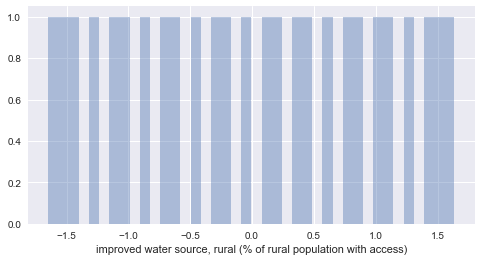

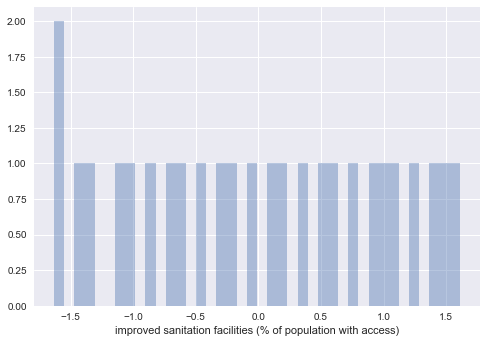

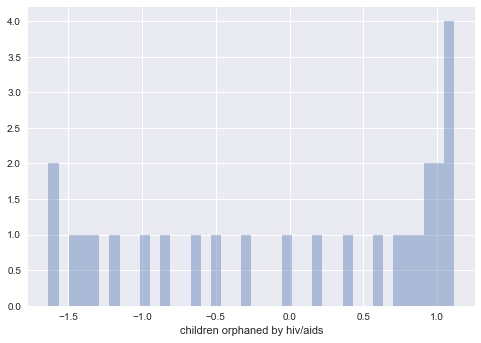

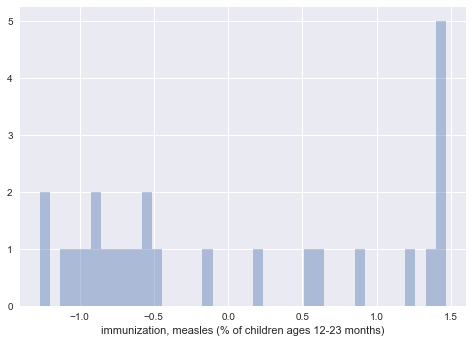

In [46]:
ax = sns.distplot(test_data['improved water source, rural (% of rural population with access)'], bins=40, kde=False)
plt.show()
ax = sns.distplot(test_data['improved sanitation facilities (% of population with access)'], bins=40, kde=False)
plt.show()
ax = sns.distplot(test_data['children orphaned by hiv/aids'], bins=40, kde=False)
plt.show()
ax = sns.distplot(test_data['immunization, measles (% of children ages 12-23 months)'], bins=40, kde=False)
plt.show()

### Other charts of predictor variables

In [47]:
fig_size = plt.rcParams["figure.figsize"]
fig_size_default = fig_size

fig_size = [12, 6]
plt.rcParams["figure.figsize"] = fig_size

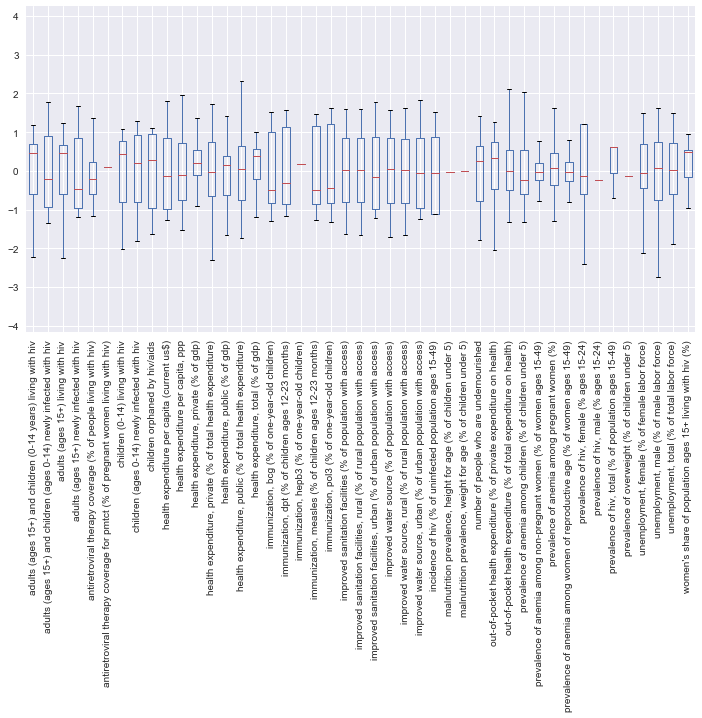

In [48]:
# do a box plot to check that the standardising has worked
test_data_box = test_data.copy()
test_data_box.drop(y_indicator, axis=1, inplace=True)
test_data_box.plot.box(rot=90)
plt.show()

plt.rcParams["figure.figsize"] = fig_size_default

In [49]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

# 'improved sanitation facilities (% of population with access)'
# 'improved water source, rural (% of rural population with access)'
# 'immunization, measles (% of children ages 12-23 months)'
# 'children orphaned by hiv/aids'

years = []
year = 1990
for i in range(26):
    years.append(year+i)
x_pos = years

def barchart(x_pos, col):
    y_pos = test_data[col].values
    y_pos = [n for n in y_pos]
    plt.bar(x_pos, y_pos, align='center')
    plt.title(col)
    plt.show()

### A greater percentage of the rural population has access to better water

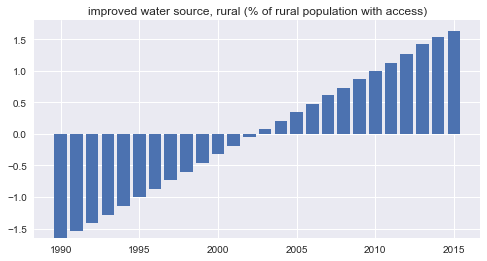

In [50]:
col = 'improved water source, rural (% of rural population with access)'
barchart(x_pos, col)

### A greater percentage of the population has access to improved sanitation

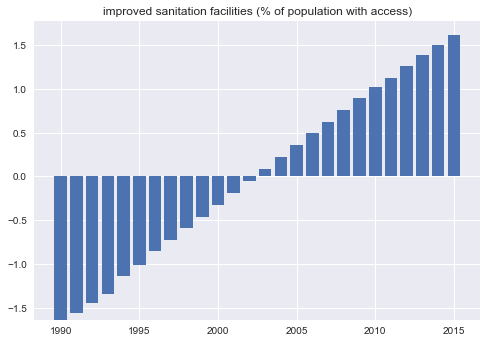

In [51]:
col = 'improved sanitation facilities (% of population with access)'
barchart(x_pos, col)

### Children orphaned by AIDS is going down after peaking around 2009

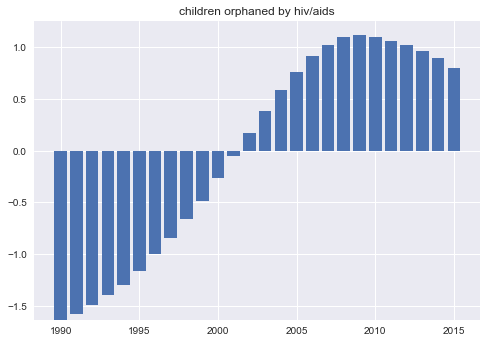

In [52]:
col = 'children orphaned by hiv/aids'
barchart(x_pos, col)

### Immunization against measles seems to have plateaued

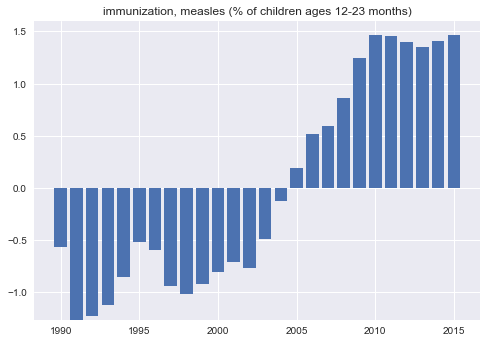

In [53]:
col = 'immunization, measles (% of children ages 12-23 months)'
barchart(x_pos, col)

### Plot 'World' life expectancy

World


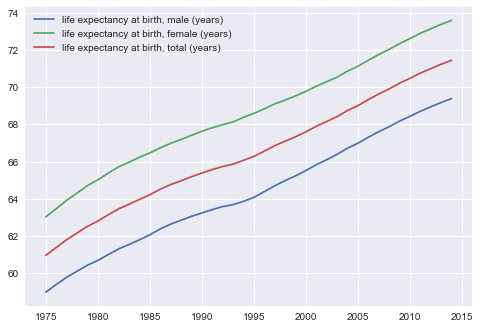

In [54]:
print('World')
the_data = data_countries_indicators_years(['World'], life_expectancy, [])
multi_line_plots(the_data, life_expectancy)

### Have a play with one of the categories

In [55]:
#for id in income_categories:
#    print(id)
#    ind_data = data_countries_indicators_years([id], sanitation, [])
#    multi_line_plots(ind_data, sanitation)

### Indicators that haven't been classified into groups
Some may be used, others may be ignored, yet to be determined. The indicators related to 'primary completion rate' should not be here as there is a broad category for this already (numpy.setdiff1d is failing).

In [56]:
print("Unclassified indicators", len(indicators))
for ind in indicators:
    print(ind)

Unclassified indicators 46
age dependency ratio, old
age dependency ratio, young
ari treatment (% of children under 5 taken to a health provider)
children with fever receiving antimalarial drugs (% of children under age 5 with fever)
community health workers (per 1,000 people)
consumption of iodized salt (% of households)
demand for family planning satisfied by any methods (% of married women with demand for family planning)
demand for family planning satisfied by modern methods (% of married women with demand for family planning)
exclusive breastfeeding (% of children under 6 months)
external resources for health (% of total expenditure on health)
female headed households (% of households with a female head)
gni per capita, atlas method (current us$)
hospital beds (per 1,000 people)
infant and young child feeding practices, all 3 iycf (% children ages 6-23 months)
labor force, female (% of total labor force)
labor force, total
literacy rate, adult female (% of females ages 15 and abov